In [90]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [114]:
#reading data
data = pd.read_csv('water_potability.csv')
df = pd.DataFrame(data)
# df = df.iloc[:1500,]



In [92]:

df_grouped_by = df.groupby(['Potability'])
df = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df = df.droplevel(['Potability'])
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.002480  168.952591  20518.555433    10.135987         NaN   
1     9.467129  169.214408  33365.315416     8.460490  315.960398   
2     6.396341  126.490745  20115.733588     7.763739  427.377802   
3     6.732714  197.766974  33820.645760     7.396764  353.176328   
4     9.764658  119.164010  38781.457422     9.334632  380.230634   
...        ...         ...           ...          ...         ...   
1273  3.994498  179.454192  18682.277139     6.464793  331.145621   
1274  7.833361  249.340053  13394.731607     8.341670  393.137872   
1275  7.295141  182.406645  13706.186808     5.887885  300.608233   
1276  3.637171  238.943744  10102.489720     7.532192  337.534425   
1277  6.179312  159.773264  21532.519232     8.063335  272.440848   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       457.646782        9.812921        56.921862   3.352436           0  
1       449.723952       10.396796        74.326898   3.164188           0  
2       435.278434       11.881668        53.659152   4.445907           0  
3       321.364518       19.340499        85.371961   3.885405           0  
4       512.331846       14.967733        59.193176   3.024571           0  
...            ...             ...              ...        ...         ...  
1273    538.174959       13.916820              NaN   3.379147           1  
1274    443.629123       10.983344        76.645734   4.270973           1  
1275    424.650179       18.063470        73.836909   5.056104           1  
1276    509.150323       13.818450        49.652834   5.446566           1  
1277    509.772110       11.010545        99.996286   2.951961           1  

[2556 rows x 10 columns]

In [93]:
#Dropping target column 
df.drop("Potability", axis = 1, inplace = True)
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.002480  168.952591  20518.555433    10.135987         NaN   
1     9.467129  169.214408  33365.315416     8.460490  315.960398   
2     6.396341  126.490745  20115.733588     7.763739  427.377802   
3     6.732714  197.766974  33820.645760     7.396764  353.176328   
4     9.764658  119.164010  38781.457422     9.334632  380.230634   
...        ...         ...           ...          ...         ...   
1273  3.994498  179.454192  18682.277139     6.464793  331.145621   
1274  7.833361  249.340053  13394.731607     8.341670  393.137872   
1275  7.295141  182.406645  13706.186808     5.887885  300.608233   
1276  3.637171  238.943744  10102.489720     7.532192  337.534425   
1277  6.179312  159.773264  21532.519232     8.063335  272.440848   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       457.646782        9.812921        56.921862   3.352436  
1       449.723952       10.396796        74.326898   3.164188  
2       435.278434       11.881668        53.659152   4.445907  
3       321.364518       19.340499        85.371961   3.885405  
4       512.331846       14.967733        59.193176   3.024571  
...            ...             ...              ...        ...  
1273    538.174959       13.916820              NaN   3.379147  
1274    443.629123       10.983344        76.645734   4.270973  
1275    424.650179       18.063470        73.836909   5.056104  
1276    509.150323       13.818450        49.652834   5.446566  
1277    509.772110       11.010545        99.996286   2.951961  

[2556 rows x 9 columns]

In [94]:
df_balanced.isnull().sum()

ph                 380
Hardness             0
Solids               0
Chloramines          0
Sulfate            597
Conductivity         0
Organic_carbon       0
Trihalomethanes    127
Turbidity            0
Potability           0
dtype: int64

In [95]:
#Removing null values
from sklearn.impute import SimpleImputer

impute = SimpleImputer(strategy='mean')

simpute = impute.fit_transform(df)


In [96]:
imputed_df = pd.DataFrame(simpute, columns=df.columns)
imputed_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [97]:
# imputed_df.replace('?', np.nan, inplace= True)
# imputed_df.isna().sum()

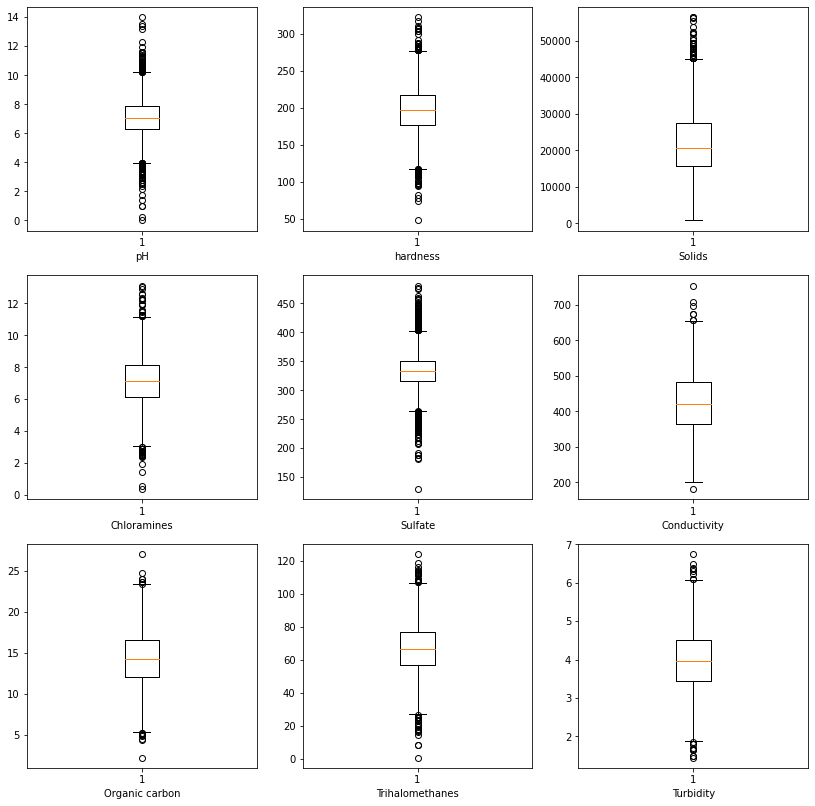

In [98]:
ph = imputed_df['ph']
hardness  = imputed_df['Hardness']
solids = imputed_df['Solids']
Chloramines = imputed_df['Chloramines']
Sulfate = imputed_df['Sulfate']
Conductivity = imputed_df['Conductivity']
Organic_carbon = imputed_df['Organic_carbon']
Trihalomethanes = imputed_df['Trihalomethanes']
Turbidity = imputed_df['Turbidity']


plt.rcParams["figure.figsize"] = [14, 14]

plt.subplot(3,3,1)
plt.boxplot(ph)
plt.xlabel('pH')

plt.subplot(3,3,2)
plt.boxplot(hardness)
plt.xlabel('hardness')

plt.subplot(3,3,3)
plt.boxplot(solids)
plt.xlabel('Solids')

plt.subplot(3,3,4)
plt.boxplot(Chloramines)
plt.xlabel('Chloramines')

plt.subplot(3,3,5)
plt.boxplot(Sulfate)
plt.xlabel('Sulfate')

plt.subplot(3,3,6)
plt.boxplot(Conductivity)
plt.xlabel('Conductivity')

plt.subplot(3,3,7)
plt.boxplot(Organic_carbon)
plt.xlabel('Organic carbon')

plt.subplot(3,3,8)
plt.boxplot(Trihalomethanes)
plt.xlabel('Trihalomethanes')

plt.subplot(3,3,9)
plt.boxplot(Turbidity)
plt.xlabel('Turbidity')

plt.show()

In [99]:
# plt.rcParams["figure.figsize"] = [5, 5]

# Q1 = ph.quantile(0.25)
# Q3 = ph.quantile(0.75)
# IQR = Q3-Q1
# upperlimit = Q3 + (IQR * 1.5)
# lowerlimit = Q1 - (IQR * 1.5)

# out1 = imputed_df[(imputed_df.ph > 1) & (imputed_df.ph <13)]
# plt.boxplot(out1['ph'])
# plt.show()

In [100]:
# imputed_df['ph'] = out1.ph
def removeph(df):
    temp = pd.DataFrame()
#     df_selling_price = df['Conductivity']
    Q1 = ph.quantile(0.25)
    Q3 = ph.quantile(0.75)
    IQR = Q3-Q1
    upperlimit = Q3 + (IQR * 1.5)
    lowerlimit = Q1 - (IQR * 1.5)

    out1 = imputed_df[(imputed_df.ph < lowerlimit) & (imputed_df.ph > upperlimit)]
    temp = pd.concat([temp,out1])
    return df.drop(temp.index)
df1 = removeph(imputed_df)

In [101]:
def removeSulfate(df):
    temp = pd.DataFrame()
    sQ1 = Sulfate.quantile(0.25)
    sQ3 = Sulfate.quantile(0.75)
    sIQR = sQ3-sQ1
    supperlimit = sQ3 + (sIQR * 1.5)
    slowerlimit = sQ1 - (sIQR * 1.5)

    out2 = imputed_df[(imputed_df.Sulfate < slowerlimit) & (imputed_df.Sulfate > supperlimit)]
    temp = pd.concat([temp,out2])
    return df.drop(temp.index)
df2 = removeSulfate(df1)
df2.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [102]:
# sQ1 = Sulfate.quantile(0.25)
# sQ3 = Sulfate.quantile(0.75)
# sIQR = Q3-Q1
# supperlimit = sQ3 + (sIQR * 1.5)
# slowerlimit = sQ1 - (sIQR * 1.5)

# out2 = imputed_df[(imputed_df.Sulfate > 200) & (imputed_df.Sulfate <450)]
# plt.boxplot(out2['Sulfate'])
# plt.show()

In [103]:
def removehardness(df):
    temp = pd.DataFrame()
    hQ1 = hardness.quantile(0.25)
    hQ3 = hardness.quantile(0.75)
    hIQR = hQ3-hQ1
    hupperlimit = hQ3 + (hIQR * 1.5)
    hlowerlimit = hQ1 - (hIQR * 1.5)

    out3 = imputed_df[(imputed_df.Hardness < hlowerlimit) & (imputed_df.Hardness > hupperlimit)]
    temp = pd.concat([temp,out3])
    return df.drop(temp.index)
df3 = removehardness(df2)
df3.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [104]:
# hQ1 = hardness.quantile(0.25)
# hQ3 = hardness.quantile(0.75)
# hIQR = hQ3-hQ1
# hupperlimit = hQ3 + (hIQR * 1.5)
# hlowerlimit = hQ1 - (hIQR * 1.5)

# out3 = imputed_df[(imputed_df.Hardness > 60) & (imputed_df.Hardness <320)]
# # out3.shape
# plt.boxplot(out3['Hardness'])
# plt.show()


In [105]:
def removeOrganic_carbon(df):
    temp = pd.DataFrame()
    oQ1 = Organic_carbon.quantile(0.25)
    oQ3 = Organic_carbon.quantile(0.75)
    oIQR = oQ3-oQ1
    oupperlimit =oQ3 + (oIQR * 1.5)
    olowerlimit = oQ1 - (oIQR * 1.5)

    out4 = imputed_df[(imputed_df.Organic_carbon < olowerlimit) & (imputed_df.Organic_carbon >oupperlimit)]
    temp = pd.concat([temp,out4])
    return df.drop(temp.index)
df4 = removeOrganic_carbon(df3)
df4.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [106]:
# oQ1 = Organic_carbon.quantile(0.25)
# oQ3 = Organic_carbon.quantile(0.75)
# oIQR = oQ3-oQ1
# oupperlimit =oQ3 + (oIQR * 1.5)
# olowerlimit = oQ1 - (oIQR * 1.5)

# out4 = imputed_df[(imputed_df.Organic_carbon > 3) & (imputed_df.Organic_carbon <25)]
# plt.boxplot(out4['Organic_carbon'])
# plt.show()

In [107]:
def removetrihalomethanes(df):
    temp = pd.DataFrame()
    tQ1 = Trihalomethanes.quantile(0.25)
    tQ3 = Trihalomethanes.quantile(0.75)
    tIQR = tQ3-tQ1
    tupperlimit = tQ3 + (tIQR * 1.5)
    tlowerlimit = tQ1 - (tIQR * 1.5)

    out5 = imputed_df[(imputed_df.Trihalomethanes < tlowerlimit) & (imputed_df.Trihalomethanes > tupperlimit)]
    temp = pd.concat([temp,out5])
    return df.drop(temp.index)
df5 = removeOrganic_carbon(df4)
df5.isna().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [108]:
# tQ1 = Trihalomethanes.quantile(0.25)
# tQ3 = Trihalomethanes.quantile(0.75)
# tIQR = tQ3-tQ1
# tupperlimit = tQ3 + (tIQR * 1.5)
# tlowerlimit = tQ1 - (tIQR * 1.5)

# out5 = imputed_df[(imputed_df.Trihalomethanes > 10) & (imputed_df.Trihalomethanes < 120)]
# plt.boxplot(out5['Trihalomethanes'])
# plt.show()

In [109]:
def removeConductivity(df):
    temp = pd.DataFrame()
#     df_selling_price = df['Conductivity']
    cQ1 = imputed_df.Conductivity.quantile(0.25)
    cQ3 = imputed_df.Conductivity.quantile(0.75)
    cIQR = cQ3-cQ1
    cupperlimit = cQ3 + (cIQR * 1.5)
    clowerlimit = cQ1 - (cIQR * 1.5)

    out6 = imputed_df[(imputed_df.Conductivity < clowerlimit) & (imputed_df.Conductivity > cupperlimit)]
    temp = pd.concat([temp,out6])
    return df.drop(temp.index)
df6 = removeConductivity(df5)
df6.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [110]:
# cQ1 = Conductivity.quantile(0.25)
# cQ3 = Conductivity.quantile(0.75)
# cIQR = cQ3-cQ1
# cupperlimit = cQ3 + (cIQR * 1.5)
# clowerlimit = cQ1 - (cIQR * 1.5)

# out6 = imputed_df[(imputed_df.Conductivity > clowerlimit) & (imputed_df.Conductivity < 700)]
# plt.boxplot(out6['Conductivity'])
# plt.show()

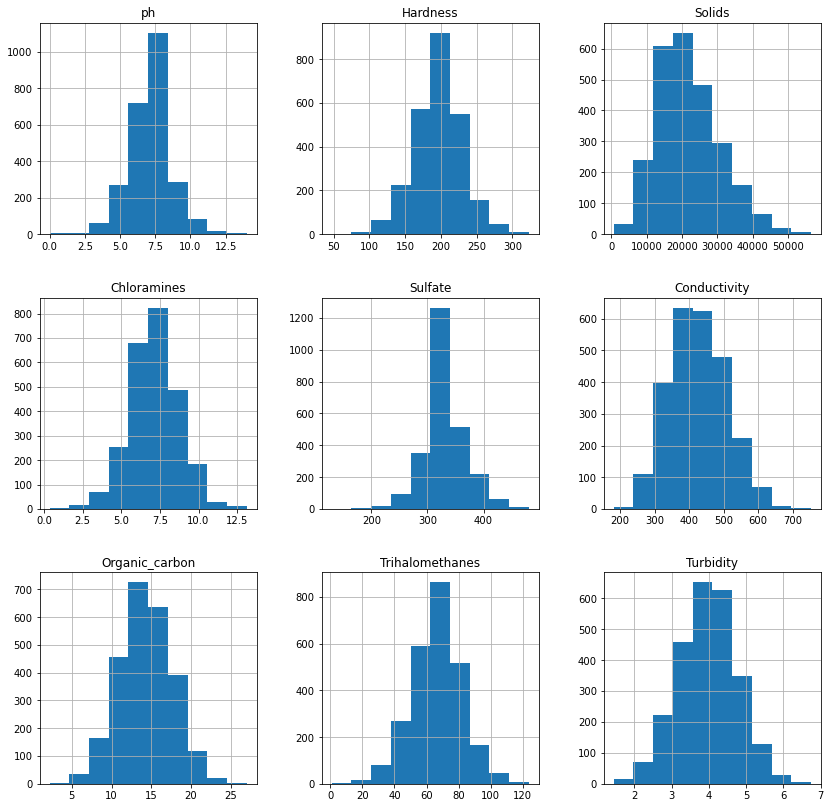

In [111]:
df6.hist(figsize=(14,14))
plt.show()

In [112]:
# Feature scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
numeric = scaler.fit_transform(df6)

feng_df = pd.DataFrame(numeric, columns = df6.columns)


In [113]:
#Logistic Regresstion
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


x = feng_df
y = target_val

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state =5, stratify = y)

# LR = LogisticRegression()
# tree = LR.fit(x_train, y_train)
# model

# knn = KNeighborsClassifier(n_neighbors=7)
# knn.fit(x_train,y_train)
# tree = knn.fit(x_train, y_train)

Dtree = DecisionTreeClassifier(criterion='gini', max_depth = 14 )
tree = Dtree.fit(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [2556, 1500]

In [ ]:
ytr_pred =  tree.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train,ytr_pred)

In [ ]:
y_hat = tree.predict(x_test)

In [ ]:
accuracy_score(y_test,y_hat)

# Pipeline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns 

In [ ]:
# Datasplitting
cols = df6.columns

X = df6
Y = target_val

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=5 ,stratify=y)

In [ ]:
transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])

In [ ]:
preprocessing = ColumnTransformer(transformers=
                       [
                           ('numeric',transformer,cols),
    
                       ])

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# estimator = KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
estimator  = DecisionTreeClassifier(criterion='gini', max_depth= 13)

In [ ]:
mymodel = Pipeline(steps=
                  [
                      ('pre',preprocessing),
                      ('est',estimator)
                  ])

In [ ]:
from sklearn import set_config
set_config(display='diagram')
mymodel.fit(X_train,Y_train)

In [ ]:
ytrain_pred = mymodel.predict(X_train) 

In [ ]:
accuracy_score(Y_train, ytrain_pred)

In [ ]:
ytest_pred = mymodel.predict(X_test) 

In [ ]:
report = classification_report(Y_train, ytrain_pred)
print("Report For train data : \n{}".format(report))

In [ ]:
report = classification_report(Y_test, ytest_pred)
print("Report for test data: \n{}".format(report))


# Hyper-Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

criterion = ['gini', 'entropy']
max_depth = [13,14,15,16,17,18]
splitter = ['best', 'random']
grid_params = [
  {
        "est__criterion":criterion,
        "est__max_depth":max_depth,
        "est__splitter": splitter,
  }
]

gs_dtree_pipeline = GridSearchCV(estimator=mymodel,
                               param_grid = grid_params,
                               scoring = 'accuracy',
                               cv = 10
                               )


In [ ]:
gs_model = gs_dtree_pipeline.fit(X_train, Y_train)

In [ ]:
pre = gs_model.predict(X_test)

In [ ]:
pre1 = gs_model.predict(X_train)

In [ ]:
report = classification_report(Y_train, pre1)
print("Report for train Data : \n{}".format(report))

In [ ]:
report = classification_report(Y_test, pre)
print("Report for test Data : \n{}".format(report))

In [ ]:
y_predi = gs_model.best_estimator_.predict(X_test)
print(y_predi)

In [ ]:
target_val.value_counts()
